In [48]:
# Import libraries
import pandas as pd
import numpy as np 

import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [3]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
print('There are {} rows and {} columns in this train dataset.'.format(df_train.shape[0],df_train.shape[1]))

There are 7613 rows and 5 columns in this train dataset.


## EDA: Part 1

In [5]:
# Find the instance difference in the target class
print('This train set contains {} instance of no disaster target'.format(len(df_train.loc[df_train['target'] == 0])))
print('This train set contains {} instance of disaster target'.format(len(df_train.loc[df_train['target'] == 1])))

This train set contains 4342 instance of no disaster target
This train set contains 3271 instance of disaster target


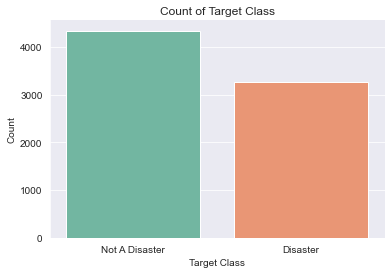

In [6]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

plot = sns.countplot(data=df_train, x='target')
plt.title('Count of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plot.set_xticklabels(['Not A Disaster', 'Disaster'])

sns.despine()
plt.show()

In [7]:
# Creating a new feature to determine the length of a text
def textlength(text):
    """A function to determine the length of text"""
    return len(text)

In [8]:
df_train['length_txt'] = df_train['text'].apply(textlength)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   length_txt  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


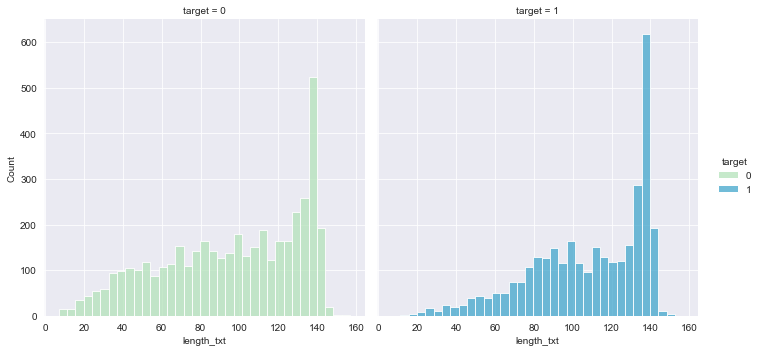

In [9]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='length_txt', bins=35, hue='target', col='target', palette='GnBu')

In [10]:
# This is showing me that the length of text is not a great feature to seperate the classes.
# However, there are more smaller length text that show that there is no disaster. 

In [11]:
# The next step to my process is examining the puncuation for each target class
# 1. Create a corpus function to make a corpus for each target.
# 2. Find which puncuation is important for each target, demonstrate with a visual

def create_corpus(target, column):
    """This function was created to create a corpus based on the target class you select"""
    corpus = []
    
    if column == 'text':
        for x in df_train[df_train.target == target][column].str.split():
            for i in x:
                corpus.append(i)
    else:
        for x in df_train[df_train.target == target][column]:
            for i in x:
                corpus.append(i)
    return corpus

In [12]:
# Remove '-' & from the analysis
def dic_punctuation(target):
    """A function that uses a corpus with a selected class and analyzes the count of punctuations"""
    corpus= create_corpus(target, 'text')
    
    dic=defaultdict(int)
    special = string.punctuation
    for word in corpus:
        if word in special:
            dic[word]+=1
    # Remove '-' from the analysis
    del dic['-']
    
    sorted_tuples = sorted(dic.items(), key= lambda item:item[1])
    dic = {k: v for k, v in sorted_tuples}
    
    return dic

Text(0.5, 1.0, 'Punctuations for a Disaster')

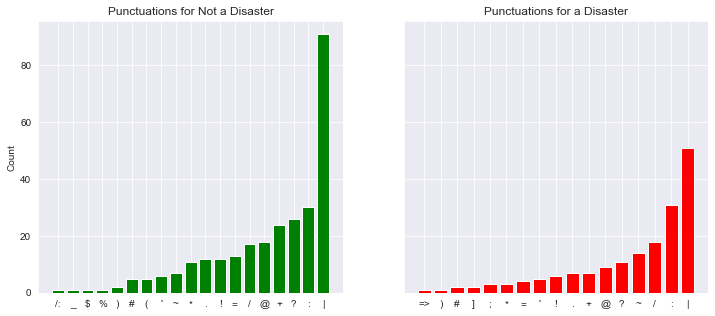

In [13]:
dic = dic_punctuation(0)
x, y=zip(*dic.items())

dic1 = dic_punctuation(1)
x1, y1=zip(*dic1.items())

fig, (axe1, axe2)= plt.subplots(1,2,sharey=True, figsize=(12,5))
axe1.bar(x,y,color='g')
axe1.set_title('Punctuations for Not a Disaster')
axe1.set_ylabel('Count')

axe2.bar(x1,y1,color='r')
axe2.set_title('Punctuations for a Disaster')


In [14]:
# I dont see any important difference and the amount of punctuations relative to the sample size for each target is less
# than 2%. Moving forward I will remove all the punctuations.

<FreqDist with 20560 samples and 63848 outcomes>


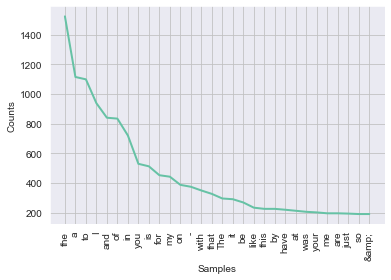

In [15]:
corpus= create_corpus(0, 'text')
fdist = FreqDist(corpus)
print(fdist)

# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

<FreqDist with 16150 samples and 49613 outcomes>


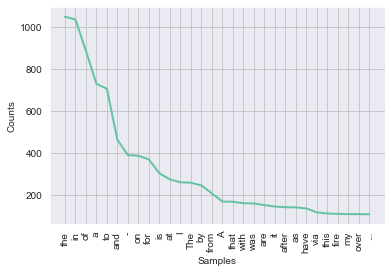

In [16]:
corpus= create_corpus(1, 'text')
fdist = FreqDist(corpus)
print(fdist)

# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

In [17]:
## Need to analysis Nouns to see if wee remove them with stop words

## Tokenization

In [18]:
def sent_token(text):
    """Performs a sentence tokenization"""
    return sent_tokenize(text)
def word_token(text):
    """Performs a word Tokenization"""
    return word_tokenize(text)

df_train['sent_tokens'] = df_train['text'].apply(sent_token)
df_train['sent_tokens_len'] = df_train['sent_tokens'].apply(textlength)

df_train['word_tokens'] = df_train['text'].apply(word_token)
df_train['word_tokens_len'] = df_train['word_tokens'].apply(textlength)

df_train.head()

,id,keyword,location,text,target,length_txt,sent_tokens,sent_tokens_len,word_tokens,word_tokens_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,[Our Deeds are the Reason of this #earthquake ...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea...",14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest fire near La Ronge Sask., Canada]",2,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,[All residents asked to 'shelter in place' are...,2,"[All, residents, asked, to, 'shelter, in, plac...",24
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000 people receive #wildfires evacuation o...",1,"[13,000, people, receive, #, wildfires, evacua...",9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,[Just got sent this photo from Ruby #Alaska as...,1,"[Just, got, sent, this, photo, from, Ruby, #, ...",18


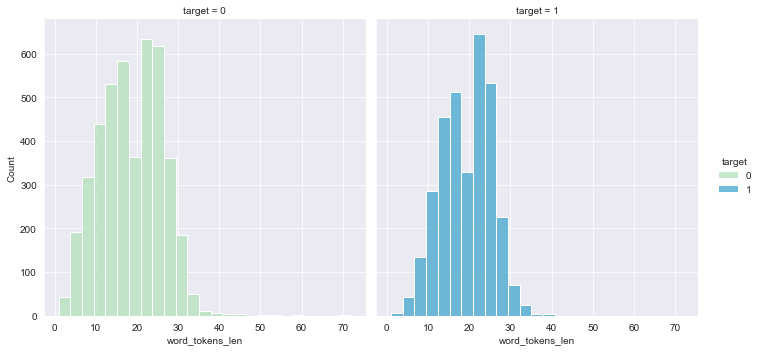

In [19]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='word_tokens_len', bins=25, hue='target', col='target', palette='GnBu')

In [ ]:
#Steps in preprocessing


# EDA part 2
# Check if the distribution of word count and word fequency has changed


## Preprocessing text
 1. Lower case, Removal of puncuation, Removal of stopwords
 2. Stemming and Lemmatization

In [20]:
stop_words = stopwords.words('english')

# Extending the stopwords list to include punctuations
stop_words.extend(string.punctuation)

# Will be removing ... http 
stop_words.extend(['...','http'])

def preprocessing(text):
    return [word.lower() for word in text if (word not in stop_words) and len(word) > 2]    

In [21]:
df_train['preprocessed_text'] = df_train['word_tokens'].apply(preprocessing)

In [22]:
df_train.head()

,id,keyword,location,text,target,length_txt,sent_tokens,sent_tokens_len,word_tokens,word_tokens_len,preprocessed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,[Our Deeds are the Reason of this #earthquake ...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea...",14,"[our, deeds, reason, earthquake, may, allah, f..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest fire near La Ronge Sask., Canada]",2,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",8,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,[All residents asked to 'shelter in place' are...,2,"[All, residents, asked, to, 'shelter, in, plac...",24,"[all, residents, asked, 'shelter, place, notif..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000 people receive #wildfires evacuation o...",1,"[13,000, people, receive, #, wildfires, evacua...",9,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,[Just got sent this photo from Ruby #Alaska as...,1,"[Just, got, sent, this, photo, from, Ruby, #, ...",18,"[just, got, sent, photo, ruby, alaska, smoke, ..."


### Stemming and Lemmatization

In [24]:
#Stemming
snowball_stemmer = nltk.SnowballStemmer('english')

def stemming_text(text):
    return [snowball_stemmer.stem(word) for word in text]

df_train['filtered_stemming'] = df_train['preprocessed_text'].apply(stemming_text)

#Lemmatization
lemmatizer = WordNetLemmatizer()

#def lemma_text(text):
    #return [lemmatizer.lemmatizer(word) for word in text]

## You need to do Parts of Speech tagging to correctly perform Lemmatization

#df_train['filtered_lemma'] = df_train['filtered_stopnpun'].apply(remove_stopwords)

df_train.head()

,id,keyword,location,text,target,length_txt,sent_tokens,sent_tokens_len,word_tokens,word_tokens_len,preprocessed_text,filtered_stemming
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,[Our Deeds are the Reason of this #earthquake ...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea...",14,"[our, deeds, reason, earthquake, may, allah, f...","[our, deed, reason, earthquak, may, allah, for..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest fire near La Ronge Sask., Canada]",2,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",8,"[forest, fire, near, ronge, sask, canada]","[forest, fire, near, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,[All residents asked to 'shelter in place' are...,2,"[All, residents, asked, to, 'shelter, in, plac...",24,"[all, residents, asked, 'shelter, place, notif...","[all, resid, ask, shelter, place, notifi, offi..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000 people receive #wildfires evacuation o...",1,"[13,000, people, receive, #, wildfires, evacua...",9,"[13,000, people, receive, wildfires, evacuatio...","[13,000, peopl, receiv, wildfir, evacu, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,[Just got sent this photo from Ruby #Alaska as...,1,"[Just, got, sent, this, photo, from, Ruby, #, ...",18,"[just, got, sent, photo, ruby, alaska, smoke, ...","[just, got, sent, photo, rubi, alaska, smoke, ..."


## EDA 2 : Analysis after preprocess

356 t h e
326 n ' t
276 h t t p s
253 l i k e
209 a m p


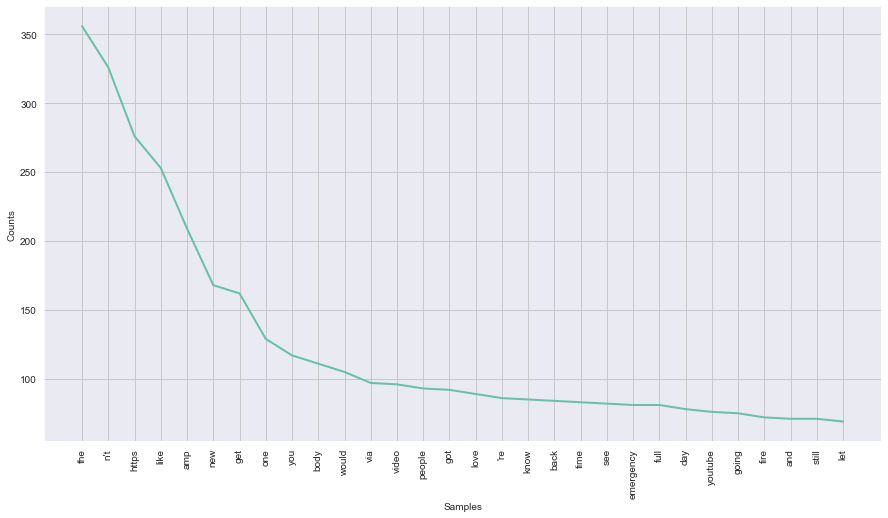

In [25]:
corpus = create_corpus(0, 'preprocessed_text')
fdist = FreqDist(corpus)

for words, count in fdist.most_common(5):
    print(count, " ".join(list(words)))

# Frequency Distribution Plot
plt.figure(figsize=(15,8))
fdist.plot(30,cumulative=False)
plt.show()

285 t h e
177 f i r e
140 n e w s
135 a m p
133 h t t p s


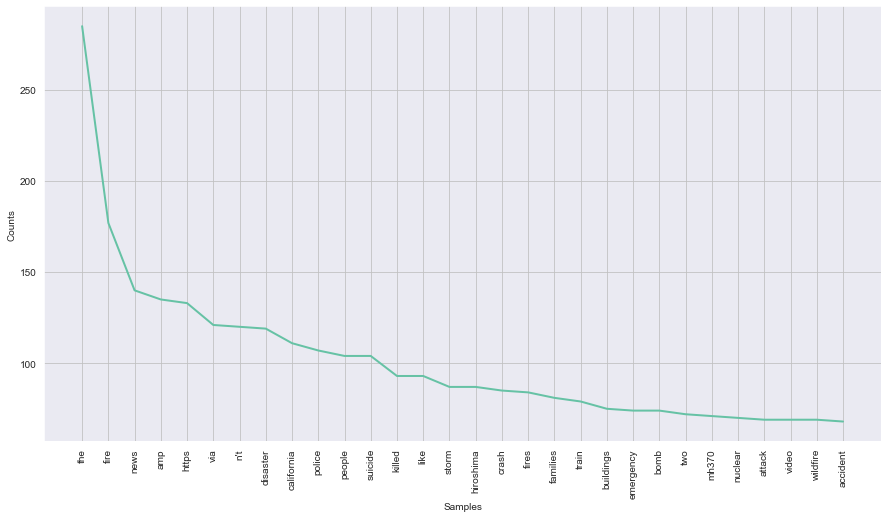

In [26]:
corpus = create_corpus(1, 'preprocessed_text')
fdist = FreqDist(corpus)

for words, count in fdist.most_common(5):
    print(count, " ".join(list(words)))

# Frequency Distribution Plot
plt.figure(figsize=(15,8))
fdist.plot(30,cumulative=False)
plt.show()

38 cross body
36 youtube video
35 liked youtube
26 body bag
25 full reû_


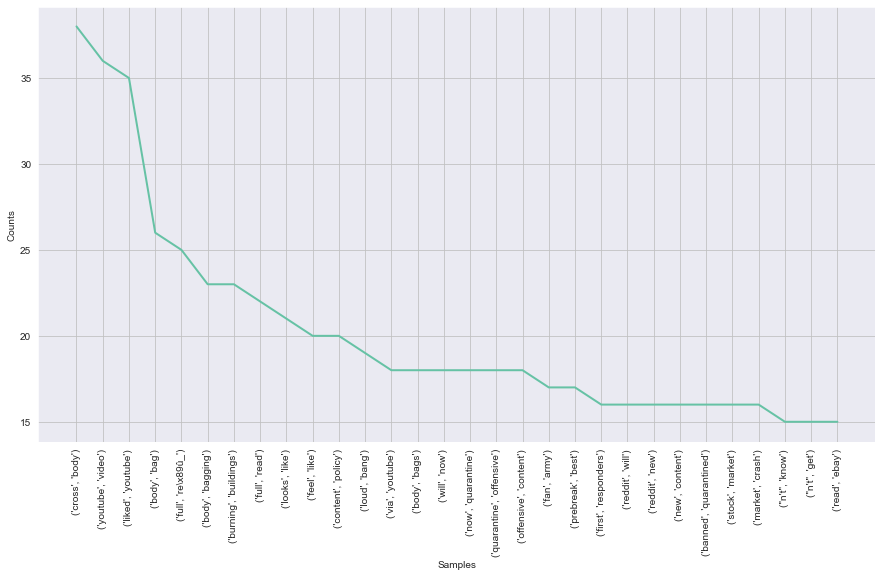

In [27]:
corpus_nostopwords = create_corpus(0, 'preprocessed_text')
bigrams = list(nltk.ngrams(corpus_nostopwords, 2))

bigramsfreqs = FreqDist(bigrams)
for words, count in bigramsfreqs.most_common(5):
    print(count, " ".join(list(words)))
    
plt.figure(figsize=(15,8))
bigramsfreqs.plot(30,cumulative=False)
plt.show()

59 suicide bomber
41 northern california
38 oil spill
35 burning buildings
34 california wildfire


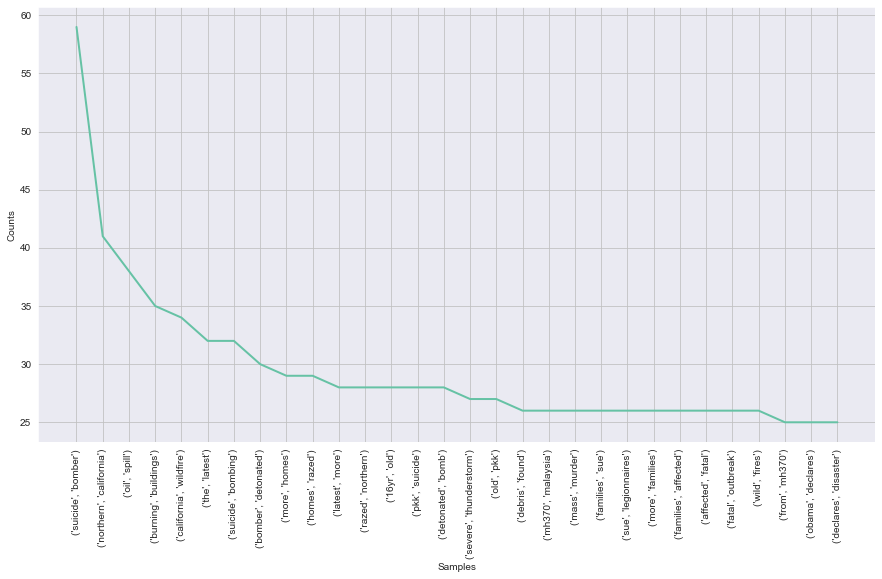

In [28]:
corpus_nostopwords = create_corpus(1, 'preprocessed_text')
bigrams = list(nltk.ngrams(corpus_nostopwords, 2))

bigramsfreqs = FreqDist(bigrams)
for words, count in bigramsfreqs.most_common(5):
    print(count, " ".join(list(words)))
    
plt.figure(figsize=(15,8))
bigramsfreqs.plot(30,cumulative=False)
plt.show()

35 liked youtube video
18 cross body bag
18 will now quarantine
18 quarantine offensive content
16 reddit will now


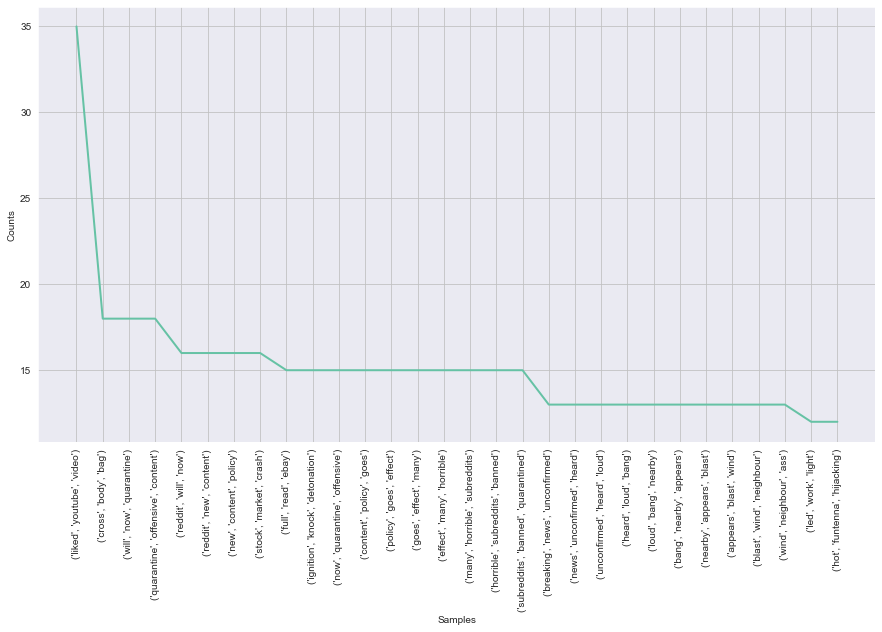

In [29]:
corpus_nostopwords = create_corpus(0, 'preprocessed_text')
trigrams = list(nltk.ngrams(corpus_nostopwords, 3))

trigramsfreqs = FreqDist(trigrams)
for words, count in trigramsfreqs.most_common(5):
    print(count, " ".join(list(words)))
    
plt.figure(figsize=(15,8))
trigramsfreqs.plot(30,cumulative=False)
plt.show()

30 suicide bomber detonated
29 northern california wildfire
29 more homes razed
28 the latest more
28 latest more homes


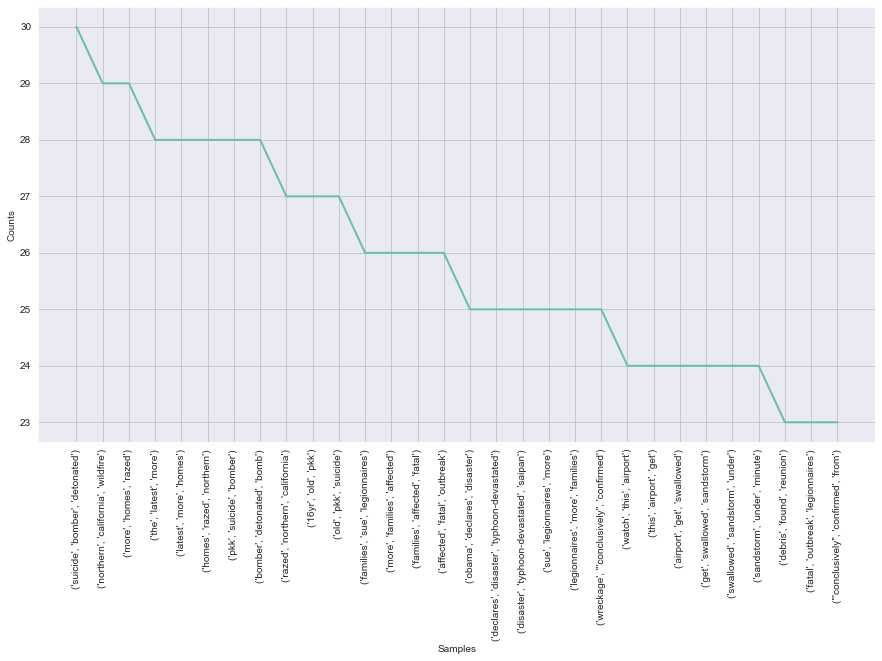

In [30]:
corpus_nostopwords = create_corpus(1, 'preprocessed_text')
trigrams = list(nltk.ngrams(corpus_nostopwords, 3))

trigramsfreqs = FreqDist(trigrams)
for words, count in trigramsfreqs.most_common(5):
    print(count, " ".join(list(words)))
    
plt.figure(figsize=(15,8))
trigramsfreqs.plot(30,cumulative=False)
plt.show()

In [32]:
corpus_preprocessed = create_corpus(0, 'preprocessed_text')
pof_0 = nltk.pos_tag(corpus_preprocessed)

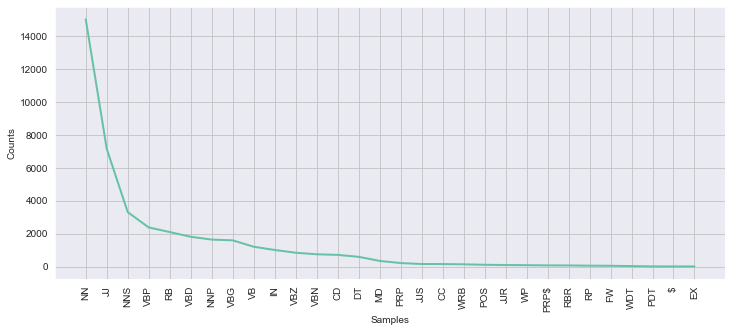

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
pof_names0 = []
for i in range(len(pof_0)):
    pof_names0.append(pof_0[i][1])

pof_dis_0 = FreqDist(pof_names0)
plt.figure(figsize=(12,5))
pof_dis_0.plot(30, cumulative=False)

In [36]:
corpus_preprocessed = create_corpus(1, 'preprocessed_text')
pof_1 = nltk.pos_tag(corpus_preprocessed)

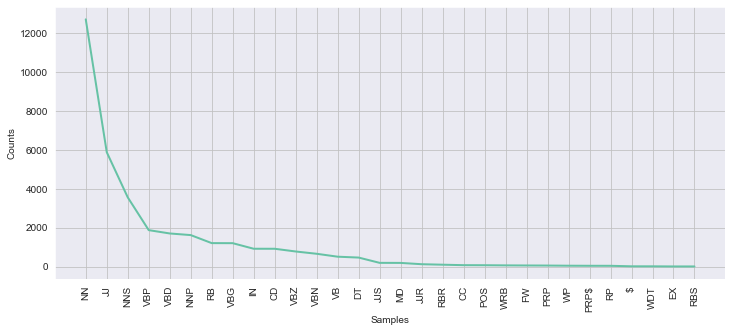

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
pof_names1 = []
for i in range(len(pof_1)):
    pof_names1.append(pof_1[i][1])

pof_dis_1 = FreqDist(pof_names1)
plt.figure(figsize=(12,5))
pof_dis_1.plot(30, cumulative=False)

In [43]:
corpus_all = []
for lists in df_train['preprocessed_text']:
    for word in lists:
        corpus_all.append(word)

pof_all = nltk.pos_tag(corpus_all)

In [52]:
lemmatizer = WordNetLemmatizer()
lemma =[lemmatizer.lemmatize(*word) for word in pof_all]

KeyError: 'PRP$'

In [46]:
nltk.pos_tag(df_train['preprocessed_text'][0])

[('our', 'PRP$'),
 ('deeds', 'NNS'),
 ('reason', 'NN'),
 ('earthquake', 'NN'),
 ('may', 'MD'),
 ('allah', 'VB'),
 ('forgive', 'JJ')]

In [49]:
df_train['pos_tag'] = df_train['preprocessed_text'].apply(nltk.pos_tag)

In [51]:
# Initialize the Lemmatizer instance
lemmatizer = WordNetLemmatizer() 
def lemmatize(text):
    return [lemmatizer.lemmatize(*word) for word in text]

df_train['filtered_lemmatize'] = df_train['pos_tag'].apply(lemmatize)

KeyError: 'PRP$'

## Feature Engineering